# Salary Prediction from LinkedIn Job Postings - Train Gradient Boosting Model

In [1]:
import xgboost as xgb
import pandas as pd, numpy as np
import salary
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, TargetEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
import joblib

/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set_theme()

## Train & Evaluate Models

In [3]:
(X_train, y_train) = salary.get_train_dataset()
(X_test, y_test) = salary.get_test_dataset()

In [4]:
preprocessor = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('one_hot_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['norm_title', 'clustered_edu_req', 'clustered_pref_qual', 'clustered_req_skill', 'location_state', 'company_industries', 'formatted_experience_level', 'formatted_work_type']),
            ('target_encoder', TargetEncoder(random_state=42), ['norm_title', 'clustered_edu_req', 'clustered_pref_qual', 'clustered_req_skill', 'location_state', 'company_industries', 'formatted_experience_level', 'formatted_work_type']),
            ('experience_level', salary.experience_level_encoder, ['formatted_experience_level']),
            ('work_type', salary.work_type_encoder, ['formatted_work_type']),
            ('remote_allowed', 'passthrough', ['remote_allowed']),
            ('company_employee_count', SimpleImputer(strategy='median'), ['company_employee_count']),
        ],
        remainder='drop'
    ),
    StandardScaler(),
)

In [5]:
preprocessor.fit_transform(X_train, y_train).shape

(27885, 318)

In [6]:
preprocessor.fit_transform(X_train, y_train).shape

(27885, 318)

### XGBoost

In [7]:
model_xgb = make_pipeline(
    clone(preprocessor),
    BayesSearchCV(
        estimator=xgb.XGBRegressor(n_estimators=500, objective='reg:squarederror', random_state=42),
        search_spaces={
            'max_depth': (7,),
            'min_child_weight': (5,),  
            'eta': (0.1,), 
            'subsample': (0.9,),
            'colsample_bytree': (0.5,), 
            'gamma': (0,),  
            'reg_alpha': (0.1,), 
            'reg_lambda': (0.1,)  
        },
        scoring='r2',
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        n_iter=50, 
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
).fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/nginyc/repos/job_posting_salary_prediction/venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9] before, using random point [0.5, 0.1, 0, 7, 5, 0.1, 0.1, 0.9]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [8]:
model_xgb

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['norm_title',
                                                                    'clustered_edu_req',
                                                                    'clustered_pref_qual',
                                                                    'clustered_req_skill',
                                                                    'location_state',
                                                                    'company_industries',
                                                                    'formatted_experience_level',
                                                                    'formatted_work_type']),
                                                                  ('targ...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=500,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...),
                               n_jobs=-1, random_state=42, scoring='r2',
                               search_spaces={'colsample_bytree': (0.5,),
                                              'eta': (0.1,), 'gamma': (0,),
                                              'max_depth': (7,),
                                              'min_child_weight': (5,),
                                              'reg_alpha': (0.1,),
                                              'reg_lambda': (0.1,),
                                              'subsample': (0.9,)},
                               verbose=1))])

In [9]:
result_xgb_train = salary.evaluate_train_predictions(model_xgb.predict(X_train))
result_xgb_test = salary.evaluate_test_predictions(model_xgb.predict(X_test))

Train R2: 0.7204
Train RMSE: 32528.2105
Train MAE: 20921.0387
Test R2: 0.5526
Test RMSE: 38992.7415
Test MAE: 25569.9748


## Check Feature Importance

,Feature,Importance
0,one_hot_encoder__formatted_experience_level_Director,0.036822
1,one_hot_encoder__formatted_experience_level_Executive,0.036035
2,one_hot_encoder__clustered_edu_req_High school diploma or equivalent,0.035209
3,one_hot_encoder__company_industries_Legal Services,0.026805
4,experience_level__formatted_experience_level,0.01985
5,target_encoder__norm_title,0.015235
6,one_hot_encoder__formatted_experience_level_Entry level,0.013977
7,one_hot_encoder__company_industries_Retail,0.013062
8,one_hot_encoder__norm_title_Medical Assistant,0.011325
9,target_encoder__formatted_experience_level,0.010719


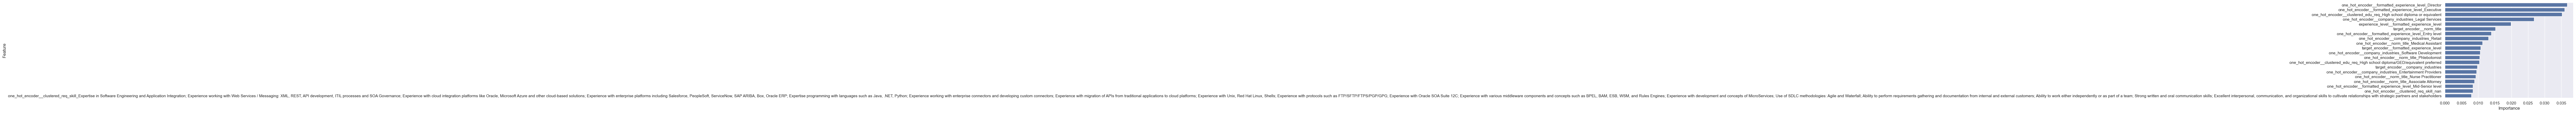

In [22]:
'''
Show top 20 important features
'''
def get_important_features(preocessor, model, n=20):
    feature_names = preocessor.get_feature_names_out(X_train.columns)
    importances = model.feature_importances_
    idxs = np.flip(np.argsort(np.abs(importances)))
    importance_df = pd.DataFrame([feature_names[idxs], importances[idxs]], index=["Feature", "Importance"]).transpose()
    sns.barplot(x="Importance", y="Feature", data=importance_df.head(n))
    pd.set_option('display.max_colwidth', None)
    return importance_df[:n]


get_important_features(model_xgb[0], model_xgb[-1].best_estimator_)

## Do Error Analysis

In [23]:
y_test_preds = model_xgb.predict(X_test)
resids = (y_test - y_test_preds).rename('residual')
abs_error = np.abs(resids).rename('abs_error')
X_test_results = pd.concat([X_test, y_test, pd.Series(y_test_preds, index=y_test.index, name='predicted_salary'), resids, abs_error], axis=1)
X_test_results

job_id                                           title  \
10953  3898168698  Staffing Industry Branch Manager - NYC office    
29454  3905289191                          Manufacturing Engineer   
21866  3903470856                   Physician Assistant Full Time   
5673   3889403735                                 Payroll Manager   
22924  3903832397         Data Analyst - Python/AWS (W2) (REMOTE)   
...           ...                                             ...   
13484  3901175485                             Family Law Attorney   
23772  3903895678                              Quality Technician   
27595  3904954999                      Sales & Leasing Specialist   
3410   3887570772  Heavy Civil Construction - Estimator (Asphalt)   
18220  3902347695                      Customer Care Professional   

                              location location_state  \
10953                     New York, NY             NY   
29454                         Cary, IL             IL   
21866                    Patchogue, NY             NY   
5673   New York City Metropolitan Area        Unknown   
22924                    United States        Unknown   
...                                ...            ...   
13484                    San Diego, CA             CA   
23772                       Tucson, AZ             AZ   
27595                      Mankato, MN             MN   
3410                      Marietta, GA             GA   
18220                      El Paso, TX             TX   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

<Axes: xlabel='residual', ylabel='Count'>

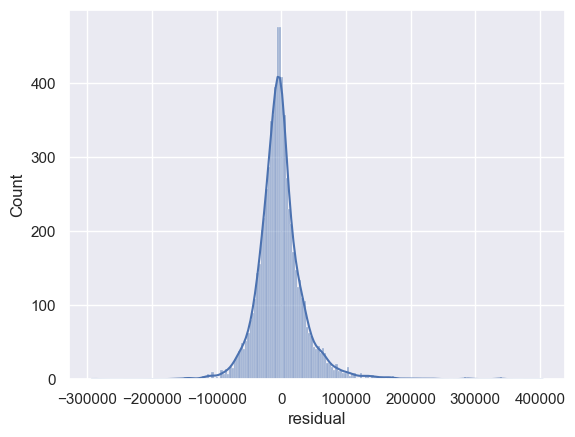

In [24]:
# Residuals look pretty normally distributed
sns.histplot(X_test_results['residual'], kde=True)

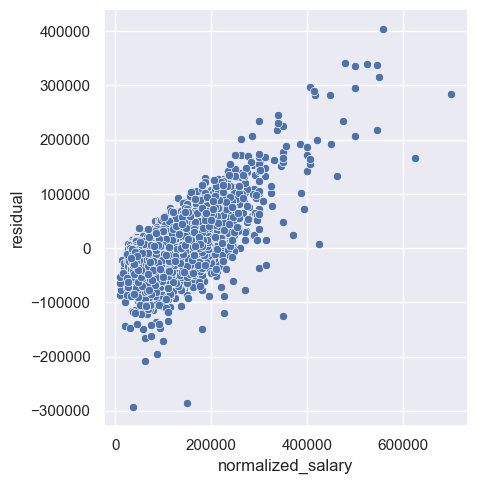

In [25]:
'''
In general, the higher the residual, the more the model underestimates the salary.
It sometimes overestimates the salary for lower salaries.
'''
sns.relplot(x='normalized_salary', y='residual', data=X_test_results, kind='scatter')

In [26]:
'''
Tends to underestimate (top 5): Nurse Practitioner, Phlebotomist, Associate Attorney, Electrical Engineer
Tends to overestimate (top 5): General Manager, Business Development Manager, Sales Representative, Accountant, Controller
'''
X_test_results.groupby('norm_title').agg({'residual': 'mean', 'norm_title': 'count'}).sort_values(by='residual')

,residual,norm_title
norm_title,,
General Manager,-11662.738263,43
Medical Assistant,-10894.075269,176
Executive Assistant,-8287.255804,68
Sales Representative,-7733.122377,42
Accountant,-6164.422743,54
...,...,...
Mechanical Engineer,4585.612891,48
Accounting Manager,5093.423839,102
Nurse Practitioner,5209.574572,74


In [27]:
'''
Norm titles with the worst absolute errors
'''
X_test_results.groupby('norm_title').agg({'abs_error': 'mean', 'norm_title': 'count'}).sort_values(by='abs_error').tail(10)

,abs_error,norm_title
norm_title,,
Sales Executive,34801.441492,128
Physical Therapist,35304.734978,98
Outside Sales Representative,35942.634432,69
Senior Project Manager,36012.670003,110
General Manager,36966.209193,43
Mortgage Loan Officer,37991.625728,51
Associate Attorney,41795.520502,127
Nurse Practitioner,44684.382786,74
Medical Assistant,46662.481488,176


In [28]:
X_test_results.groupby('formatted_experience_level').agg({'abs_error': 'mean', 'formatted_experience_level': 'count'}).sort_values(by='abs_error')

,abs_error,formatted_experience_level
formatted_experience_level,,
Entry level,17177.469202,1765
Internship,17621.376323,59
Associate,20976.689248,777
Unknown,28545.388878,1582
Mid-Senior level,28914.156734,2466
Director,37317.565858,250
Executive,66117.471875,73


In [29]:
X_test_results.groupby('formatted_work_type').agg({'abs_error': 'mean', 'formatted_work_type': 'count'}).sort_values(by='abs_error')

,abs_error,formatted_work_type
formatted_work_type,,
Volunteer,6539.943359,2
Part-time,16001.991387,452
Temporary,19063.534081,69
Internship,19225.447639,45
Full-time,26178.546899,5632
Contract,27340.033201,748
Other,39976.439827,24


In [30]:
X_test_results.sort_values(by='abs_error')[['job_id', 'title', 'norm_title', 'location', 'formatted_work_type', 'formatted_experience_level', 'normalized_salary', 'predicted_salary', 'residual']].tail(10)

,job_id,title,norm_title,location,formatted_work_type,formatted_experience_level,normalized_salary,predicted_salary,residual
14469,3901377257,Psychiatrist,Physical Therapist,"New York, United States",Contract,Unknown,415000.0,126143.679688,288856.320312
27146,3904928125,Endodontist,Phlebotomist,"Plantation, FL",Part-time,Mid-Senior level,36000.0,329301.343750,-293301.343750
29214,3905259087,"Chief Product Officer, Slack",Senior Software Engineer,"San Francisco, CA",Full-time,Mid-Senior level,499000.0,204209.453125,294790.546875
27690,3904959000,Psychiatrist,Physical Therapist,"Grafton, OH",Part-time,Unknown,405600.0,108265.703125,297334.296875
25067,3904389540,"Vice President, Client Relationship Manager, RIA/Family Office (Southwest)",OPERATIONS ASSISTANT MANAGER,"California, United States",Full-time,Executive,550000.5,233831.375000,316169.125000
19587,3902780751,Director of Construction,Construction Project Manager,"Tuscaloosa, AL",Full-time,Unknown,500500.0,164859.171875,335640.828125
21460,3903443829,Obstetrics and Gynecology Physician,Medical Assistant,"Monroe, NY",Full-time,Mid-Senior level,546000.0,207622.078125,338377.921875
5189,3888958396,"Stanford Cardiology, Electrophysiology",Electrical Engineer,"Pleasanton, CA",Full-time,Executive,525000.0,186465.921875,338534.078125
17440,3901978687,Attorney,Associate Attorney,"California, United States",Contract,Unknown,480000.0,139119.265625,340880.734375
459,3884434376,General Dermatologist,Phlebotomist,"Akron, OH",Full-time,Mid-Senior level,557500.0,153058.453125,404441.546875


## Export Best Model

In [31]:
joblib.dump(model_xgb, 'models/best_model_gradient_boosting.pkl')

['models/best_model_gradient_boosting.pkl']